

*   Customer Segmentation Using RFM Analysis: Realizing Through Python Implementation


*   Pacific Business Review International Volume 13 issue 11 May 2021




*   Author: NAYANA R , NAVYA TC
*   Version:0.1 Jun 08,2024












# **Declaring Python Libraries and Loading Data File in Python**

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
color= sns. color_palette()

# **Loading Datafile in Python**


In [ ]:
df = pd.read_excel('Online Retail.xlsx')


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
df['Description'] = df['Description'].fillna('No description')


In [ ]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()


5225


In [ ]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
# Convert Description to lowercase
df['Description'] = df['Description'].str.lower()


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# **Listing unique geographical Nations and its corresponding Customer ID'S**

In [ ]:
df1=df
df1.Country.nunique()

37

In [ ]:
df1.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
customer_country= df1[['Country','CustomerID',]].drop_duplicates()
customer_country.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


# **Listing country wise customers sorting by Customer ID'S**

In [ ]:
ccgc=customer_country.groupby(['Country']).sum()
ccgc['CustomerID']=ccgc['CustomerID'].astype(int)
ccgc.head()

,CustomerID
Country,
Australia,115614
Austria,137631
Bahrain,24708
Belgium,311123
Brazil,12769


In [ ]:
customer_country.groupby(['Country']).sum().reset_index().sort_values(by='CustomerID',ascending=False)
customer_country.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


# **Listing country wise customers sorting by Customer ID( geographical segmentation)**

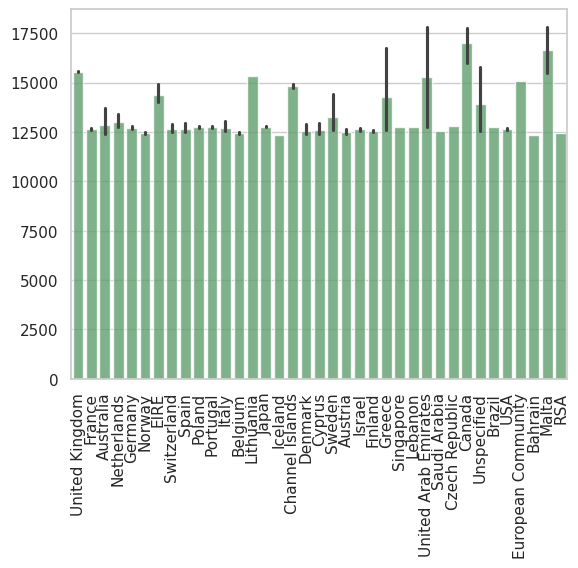

In [ ]:
country = list(customer_country["Country" ])
Cust_Id = list (customer_country['CustomerID'])
plt.Figure(figsize=(12, 9))
sns.barplot(x=country,y=Cust_Id, alpha=0.8, color=color[2])
plt.xticks(rotation='vertical')
plt.show()

# **Behavioral Segmentation**

In [ ]:
df1=df1.loc[df1['Country']=='United Kingdom']
Cust_Id_UK= df1['CustomerID'].drop_duplicates()

In [ ]:
Cust_Id_UK.head()

0     17850.0
9     13047.0
46    13748.0
65    15100.0
82    15291.0
Name: CustomerID, dtype: float64

In [ ]:
# Calculate total price
df1['TotalPrice'] = df1['UnitPrice'] * df1['Quantity']

In [ ]:
import datetime
NOW = datetime.datetime.now()
rfmTable = df1.groupby('CustomerID').agg({
    'InvoiceDate':lambda x:(x.max()-x.min()).days,
    'InvoiceNo':lambda x:len(x),
    'TotalPrice':lambda x: x.sum()})

In [ ]:
segmented_rfm = rfmTable.rename(columns={"InvoiceDate":'Recency',
                                         'InvoiceNo':'Frequency',
                                         'TotalPrice':'Monetary'})
segmented_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,0,2,0.00
12747.0,366,103,4196.01
12748.0,372,4459,28405.56
12749.0,209,231,3868.20
12820.0,323,59,942.34


# **Creating RFM Score**

In [ ]:
# Define scoring functions
def RScore_compare(r):
    if r <= 74.6:
        return 1
    elif r > 74.6 and r <= 149.2:
        return 2
    elif r > 149.2 and r <= 223.8:
        return 3
    elif r > 223.8 and r <= 298.4:
        return 4
    else:
        return 5

def FMScore_compare(r):
    if r <= 74.6:
        return 5
    elif r > 74.6 and r <= 149.2:
        return 4
    elif r > 149.2 and r <= 223.8:
        return 3
    elif r > 223.8 and r <= 298.4:
        return 2
    else:
        return 1



# **Listing RFM customer IDs and their corresponding RFM scores**

In [ ]:
# Apply the functions to create the R, F, and M scores
segmented_rfm['Recency'] = segmented_rfm['Recency'].apply(RScore_compare)
segmented_rfm['Frequency'] = segmented_rfm['Frequency'].apply(FMScore_compare)
segmented_rfm['Monetary'] = segmented_rfm['Monetary'].apply(FMScore_compare)

# Combine R, F, and M scores into a single RFMScore
segmented_rfm['RFMScore'] = segmented_rfm['Recency'].astype(str) + segmented_rfm['Frequency'].astype(str) + segmented_rfm['Monetary'].astype(str)

segmented_rfm.head()

,Recency,Frequency,Monetary,RFMScore
CustomerID,,,,
12346.0,1,5,5,155
12747.0,5,4,1,541
12748.0,5,1,1,511
12749.0,3,2,1,321
12820.0,5,5,1,551


In [ ]:

# Filter and sort the DataFrame
filtered_sorted_rfm = segmented_rfm[segmented_rfm['RFMScore'] == '111'].sort_values('Monetary', ascending=False)

# Display the filtered and sorted DataFrame
print("Filtered and Sorted DataFrame:")
print(filtered_sorted_rfm)


Filtered and Sorted DataFrame:
            Recency  Frequency  Monetary RFMScore
CustomerID                                       
12856.0           1          1         1      111
13521.0           1          1         1      111
13755.0           1          1         1      111
14547.0           1          1         1      111
15993.0           1          1         1      111
16049.0           1          1         1      111
16984.0           1          1         1      111
17509.0           1          1         1      111
17813.0           1          1         1      111
17850.0           1          1         1      111


In [ ]:

# Filter and sort the DataFrame
filtered_sorted_rfm = segmented_rfm[segmented_rfm['RFMScore'] == '555'].sort_values('Monetary', ascending=False)

# Display the filtered and sorted DataFrame
print("Filtered and Sorted DataFrame:")
print(filtered_sorted_rfm)


Filtered and Sorted DataFrame:
            Recency  Frequency  Monetary RFMScore
CustomerID                                       
14777.0           5          5         5      555
14865.0           5          5         5      555
17816.0           5          5         5      555


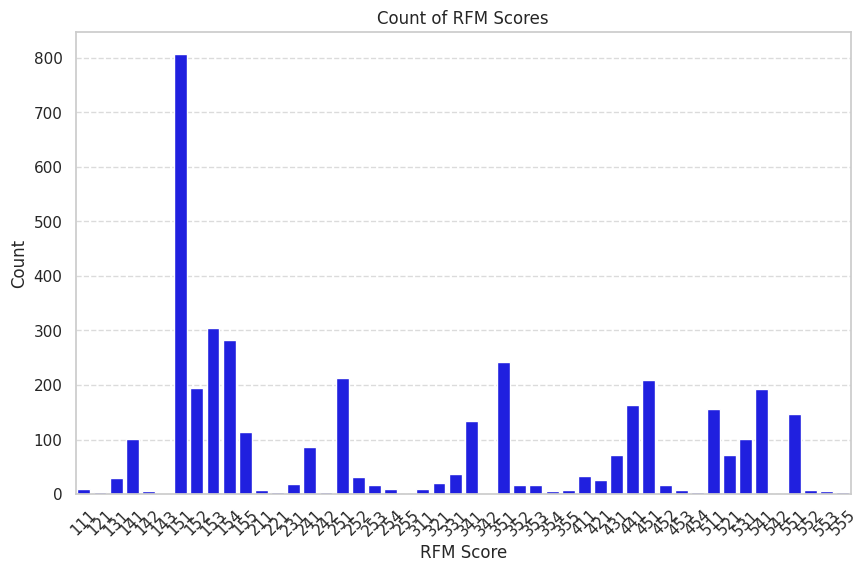

In [ ]:

# Count the occurrences of each RFMScore
rfm_score_counts = segmented_rfm['RFMScore'].value_counts().reset_index()
rfm_score_counts.columns = ['RFMScore', 'Count']

# Sort the dataframe by RFMScore for a better visualization
rfm_score_counts = rfm_score_counts.sort_values(by='RFMScore')

# Plot a bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='RFMScore', y='Count', data=rfm_score_counts, color='blue')
plt.title('Count of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **EQUAL WIDTH**

In [ ]:
# Load the dataset with the specified encoding
df2 = df.copy()
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Calculate total price
df2['TotalPrice'] = df2['UnitPrice'] * df2['Quantity']

In [ ]:
import pandas as pd
import numpy as np

df2['Date'] = pd.to_datetime(df2['InvoiceDate'])

#Maximum date of entire  dataset
reference_date = df['InvoiceDate'].max()

def calculate_recency(dates): #dates = pd.Series(['2023-01-01', '2023-01-05', '2023-01-09'], dtype='datetime64[ns]')
    return (reference_date - dates.max()).days  #Days between the last transaction of dataset date
                                                       #and last transaction of date of each customer.

# Calculate RFM metrics
rfm = df2.groupby('CustomerID').agg({ #Groups the DataFrame by the CustomerID column.
                                      #Applies aggregation functions to each group. Specifically
    'Date': calculate_recency,
    'InvoiceNo': 'count', # Frequency
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={'Date': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Remove rows where any column has a value of 0
rfm = rfm[(rfm['Recency'] != 0) & (rfm['Frequency'] != 0) & (rfm['Monetary'] != 0)]

rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
12352.0,35,95,1545.41


In [ ]:
# Binning the R, F, M values into equal-width bins
# Equal-width binning using cut
num_bins = 5
rfm['R_bin'] = pd.cut(rfm['Recency'],bins=num_bins, labels=False) + 1
rfm['F_bin'] = pd.cut(rfm['Frequency'], bins=num_bins, labels=False) + 1
rfm['M_bin'] = pd.cut(rfm['Monetary'], bins=num_bins, labels=False) + 1
rfm.head()



,Recency,Frequency,Monetary,R_bin,F_bin,M_bin
CustomerID,,,,,,
12347.0,1,182,4310.00,1,1,1
12348.0,74,31,1797.24,1,1,1
12349.0,18,73,1757.55,1,1,1
12350.0,309,17,334.40,5,1,1
12352.0,35,95,1545.41,1,1,1


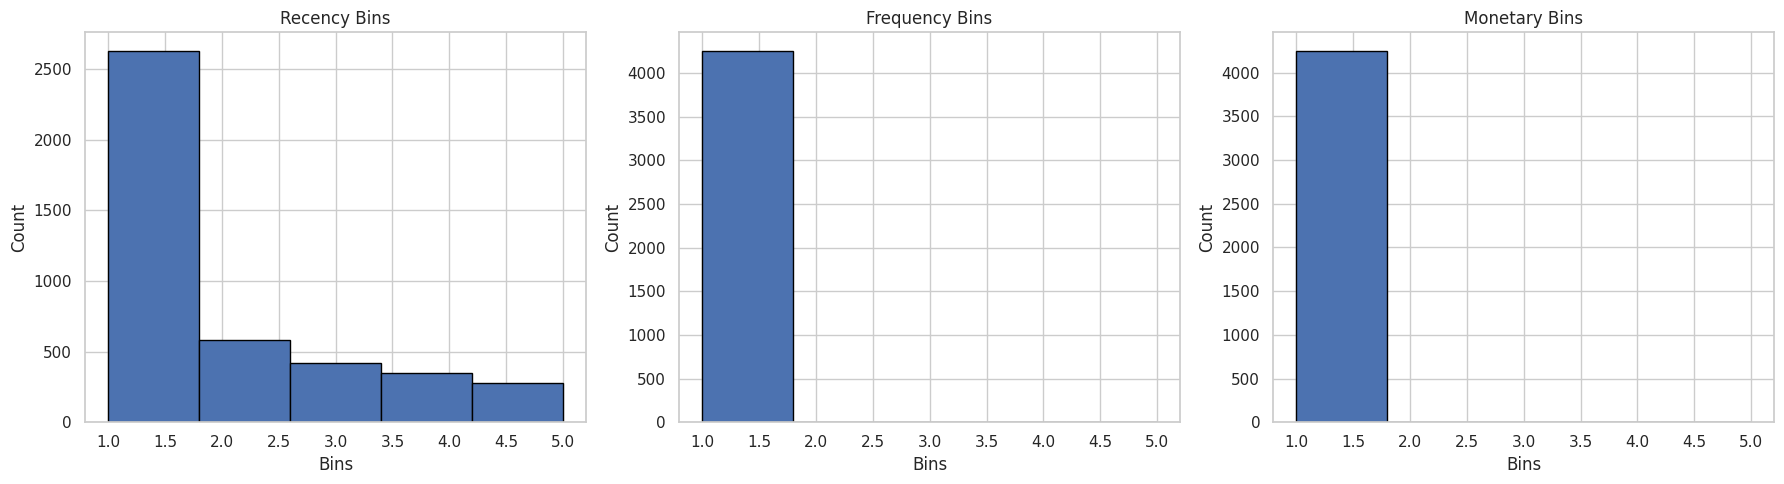

In [ ]:
# Plotting histograms for R, F, and M bins
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

num_bins = 5
# Recency histogram
axes[0].hist(rfm['R_bin'], bins=num_bins, edgecolor='black') # Changed df2 to rfm
axes[0].set_title('Recency Bins')
axes[0].set_xlabel('Bins')
axes[0].set_ylabel('Count')

# Frequency histogram
axes[1].hist(rfm['F_bin'], bins=num_bins, edgecolor='black') # Changed df2 to rfm
axes[1].set_title('Frequency Bins')
axes[1].set_xlabel('Bins')
axes[1].set_ylabel('Count')

# Monetary histogram
axes[2].hist(rfm['M_bin'], bins=num_bins, edgecolor='black') # Changed df2 to rfm
axes[2].set_title('Monetary Bins')
axes[2].set_xlabel('Bins')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

#**Equal Frequency**

In [ ]:
# Load the dataset with the specified encoding
df3 = df.copy()
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Calculate total price
df3['TotalPrice'] = df3['UnitPrice'] * df3['Quantity']


In [ ]:
import pandas as pd

# Assuming df3 is your DataFrame with 'CustomerID' and 'InvoiceDate' columns

# Convert 'InvoiceDate' column to datetime format
df3['Date'] = pd.to_datetime(df3['InvoiceDate'])

# Define a function to calculate recency
def calculate_recency_in_days(x):
    return (x.max() - x.min()).days

def calculate_recency_in_weeks(x):
    return ((x.max() - x.min()).days) // 7

def calculate_recency_in_months(x):
    return ((x.max() - x.min()).days) // 30  # Approximation assuming 30 days per month

# Calculate RFM metrics
rfm = df3.groupby('CustomerID').agg({
    'Date': [calculate_recency_in_days, calculate_recency_in_weeks, calculate_recency_in_months], #list of the three functions.
    # After aggregation, the column names will be in a MultiIndex.
    'CustomerID': 'count',  # Frequency
    'TotalPrice': 'sum'     # Monetary
})

# Flatten the MultiIndex columns and rename them
rfm.columns = ['RecencyDays', 'RecencyWeeks', 'RecencyMonths', 'Frequency', 'Monetary']#"Flattening" the MultiIndex means converting it into a single-level column index.

rfm.head()


,RecencyDays,RecencyWeeks,RecencyMonths,Frequency,Monetary
CustomerID,,,,,
12346.0,0,0,0,2,0.00
12347.0,365,52,12,182,4310.00
12348.0,282,40,9,31,1797.24
12349.0,0,0,0,73,1757.55
12350.0,0,0,0,17,334.40


#**Calculate RFM Metrics**




In [ ]:
df2['Date'] = pd.to_datetime(df2['InvoiceDate'])

#Maximum date of entire  dataset
reference_date = df['InvoiceDate'].max()

def calculate_recency(dates): #dates = pd.Series(['2023-01-01', '2023-01-05', '2023-01-09'], dtype='datetime64[ns]')
    return (reference_date - dates.max()).days  #Days between the last transaction of dataset date
                                                       #and last transaction of date of each customer.

# Calculate RFM metrics
rfm = df2.groupby('CustomerID').agg({ #Groups the DataFrame by the CustomerID column.
                                      #Applies aggregation functions to each group. Specifically
    'Date': calculate_recency,
    'InvoiceNo': 'count', # Frequency
    'TotalPrice': 'sum'  # Monetary
}).rename(columns={'Date': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'})

# Remove rows where any column has a value of 0
rfm = rfm[(rfm['Recency'] != 0) & (rfm['Frequency'] != 0) & (rfm['Monetary'] != 0)]

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
12352.0,35,95,1545.41


# Equal Frequency Binning

In [ ]:
# Equal frequency binning using qcut
rfm['R_bin'] = pd.qcut(rfm['Recency'], q=5, labels=False) + 1
rfm['F_bin'] = pd.qcut(rfm['Frequency'], q=5, labels=False) + 1
rfm['M_bin'] = pd.qcut(rfm['Monetary'], q=5, labels=False) + 1

rfm.head()

,Recency,Frequency,Monetary,R_bin,F_bin,M_bin
CustomerID,,,,,,
12347.0,1,182,4310.00,1,5,5
12348.0,74,31,1797.24,4,3,4
12349.0,18,73,1757.55,2,4,4
12350.0,309,17,334.40,5,2,2
12352.0,35,95,1545.41,3,4,4


In [ ]:
rfm['R_bin'] = pd.qcut(rfm['Recency'], q=5, labels= ['Very Recent', 'Recent', 'Moderately Recent', 'Less Recent', 'Not Recent'])
rfm['F_bin'] = pd.qcut(rfm['Frequency'], q=5, labels=['Very Frequent', 'Frequent', 'Moderately Frequent', 'Less Frequent', 'Infrequent'])
rfm['M_bin'] = pd.qcut(rfm['Monetary'], q=5, labels=['Very High', 'High', 'Moderate', 'Low', 'Very Low'])
rfm.head()

,Recency,Frequency,Monetary,R_bin,F_bin,M_bin
CustomerID,,,,,,
12347.0,1,182,4310.00,Very Recent,Infrequent,Very Low
12348.0,74,31,1797.24,Less Recent,Moderately Frequent,Low
12349.0,18,73,1757.55,Recent,Less Frequent,Low
12350.0,309,17,334.40,Not Recent,Frequent,High
12352.0,35,95,1545.41,Moderately Recent,Less Frequent,Low


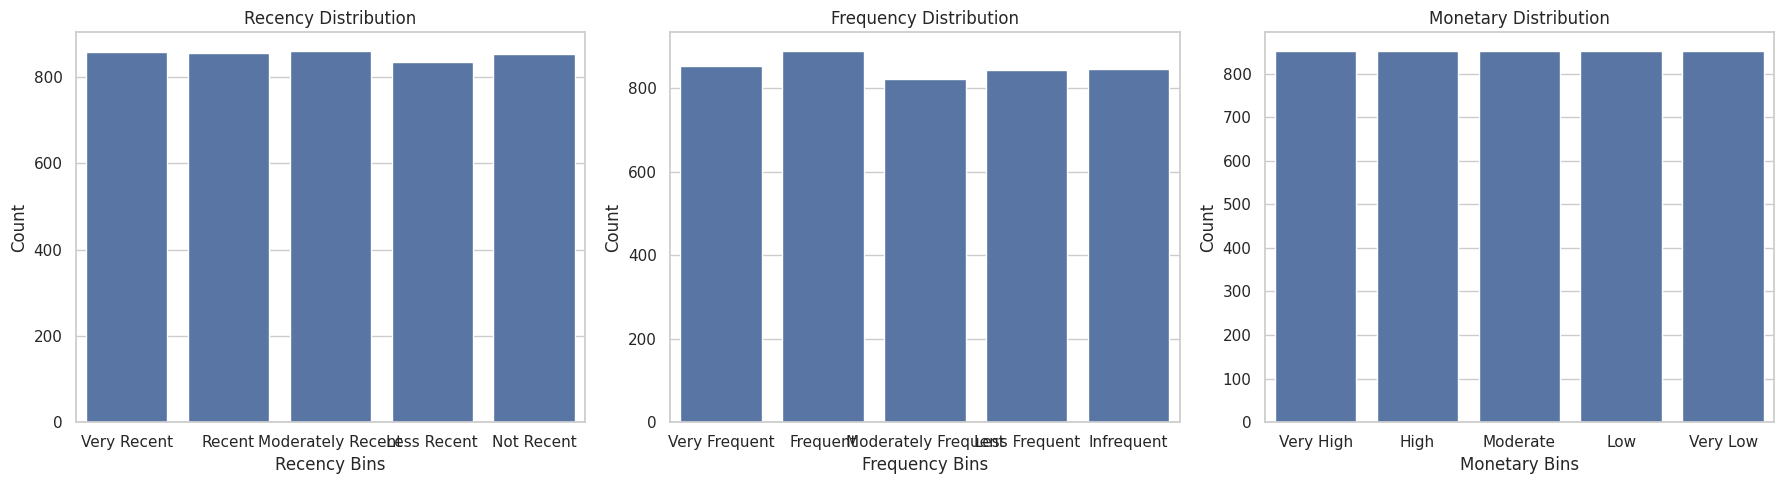

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Recency bins
sns.countplot(x='R_bin', data=rfm, ax=axes[0])
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Recency Bins')
axes[0].set_ylabel('Count')

# Plot Frequency bins
sns.countplot(x='F_bin', data=rfm, ax=axes[1])
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Frequency Bins')
axes[1].set_ylabel('Count')

# Plot Monetary bins
sns.countplot(x='M_bin', data=rfm, ax=axes[2])
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Monetary Bins')
axes[2].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

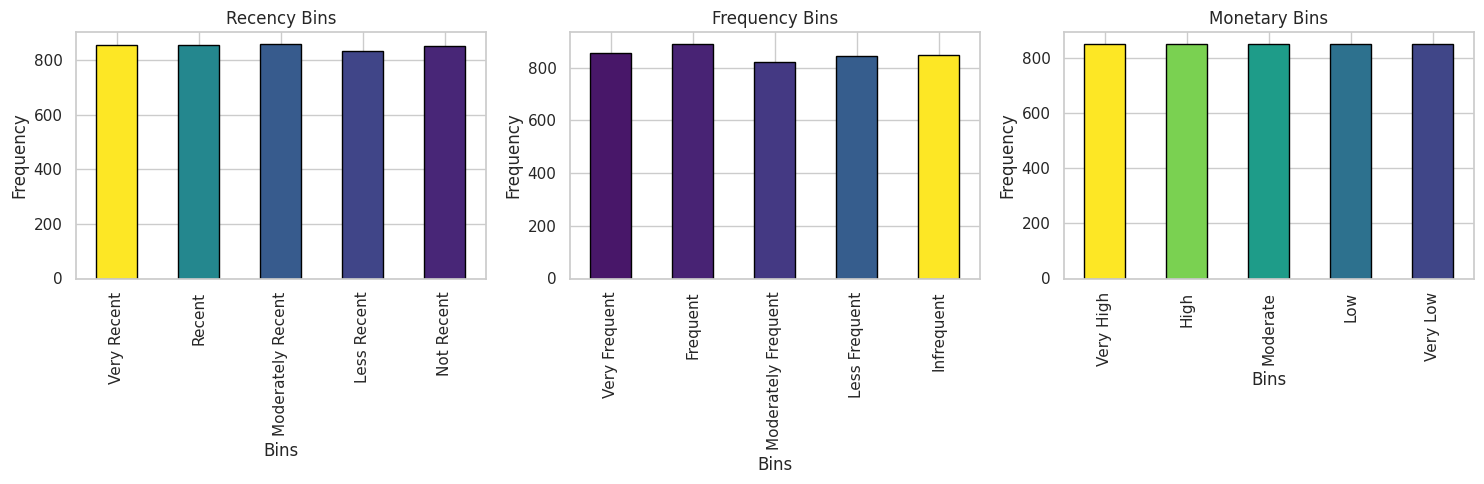

In [ ]:
# Calculate average monetary value for each Rbin and Fbin
avg_monetary_per_R_bin = rfm.groupby('R_bin')['Monetary'].mean()
avg_monetary_per_F_bin = rfm.groupby('F_bin')['Monetary'].mean()

# Calculate average recency for Monetary bins
avg_recency_per_M_bin = rfm.groupby('M_bin')['Recency'].mean()

#for recency bins and frequency bins the color of bars should be avg monetory value and for monetory bin average recency
#Expectation high value cx are best cx

# Plotting the bar graphs
plt.figure(figsize=(15, 5))

# Bar plot for Recency bins
plt.subplot(1, 3, 1)
rfm['R_bin'].value_counts().sort_index().plot(kind='bar', edgecolor='black',color=plt.cm.viridis(avg_monetary_per_R_bin / avg_monetary_per_R_bin.max()))
plt.title('Recency Bins')
plt.xlabel('Bins')
plt.ylabel('Frequency')

# Bar plot for Frequency bins
plt.subplot(1, 3, 2)
rfm['F_bin'].value_counts().sort_index().plot(kind='bar', edgecolor='black', color=plt.cm.viridis(avg_monetary_per_F_bin / avg_monetary_per_F_bin.max()))
plt.title('Frequency Bins')
plt.xlabel('Bins')
plt.ylabel('Frequency')

# Bar plot for Monetary bins
plt.subplot(1, 3, 3)
rfm['M_bin'].value_counts().sort_index().plot(kind='bar', edgecolor='black',color=plt.cm.viridis(avg_recency_per_M_bin / avg_recency_per_M_bin.max()))
plt.title('Monetary Bins')
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **Performing Chi-Square Test**

In [ ]:
# Create bins for Recency, Frequency, and Monetary using quantiles
rfm['R_bin'] = pd.qcut(rfm['Recency'], q=5, labels=['Very Recent', 'Recent', 'Moderately Recent', 'Less Recent', 'Not Recent'])
rfm['F_bin'] = pd.qcut(rfm['Frequency'], q=5, labels=['Very Frequent', 'Frequent', 'Moderately Frequent', 'Less Frequent', 'Infrequent'])
rfm['M_bin'] = pd.qcut(rfm['Monetary'], q=5, labels=['Very High', 'High', 'Moderate', 'Low', 'Very Low'])

# Ensure that we have correct mapping to 'Low' and 'High'
# For simplicity, we'll map the first two bins to 'Low' and the rest to 'High'
rfm['R_bin_mapped'] = rfm['R_bin'].map({
    'Very Recent': 'Low',
    'Recent': 'Low',
    'Moderately Recent': 'High',
    'Less Recent': 'High',
    'Not Recent': 'High'
})

# Check the distribution of the mapped R_bin to make sure both 'Low' and 'High' are present
print(rfm['R_bin_mapped'].value_counts())

# Crosstab for Monetary values
crosstab_Monetary = pd.crosstab(rfm['R_bin_mapped'], rfm['M_bin'])

# Crosstab for Frequency values
crosstab_Frequency = pd.crosstab(rfm['R_bin_mapped'], rfm['F_bin'])

# Verify the contingency tables before chi-squared test
print("\nContingency table for Monetary values:")
print(crosstab_Monetary)

print("\nContingency table for Frequency values:")
print(crosstab_Frequency)

# Chi-squared test for Monetary values
if not crosstab_Monetary.empty:
    chi2_Monetary, p_Monetary, _, _ = chi2_contingency(crosstab_Monetary)
else:
    chi2_Monetary, p_Monetary = np.nan, np.nan
    print("Contingency table for Monetary values is empty.")

# Chi-squared test for Frequency values
if not crosstab_Frequency.empty:
    chi2_Frequency, p_Frequency, _, _ = chi2_contingency(crosstab_Frequency)
else:
    chi2_Frequency, p_Frequency = np.nan, np.nan
    print("Contingency table for Frequency values is empty.")

# Printing results
print("\nChi-squared test with Monetary:")
print(f"Chi2: {chi2_Monetary}, p-value: {p_Monetary}")

print("\nChi-squared test with Frequency:")
print(f"Chi2: {chi2_Frequency}, p-value: {p_Frequency}")

alpha = 0.05

# Check significance for monetary values
if not np.isnan(p_Monetary) and p_Monetary < alpha:
    print("\nReject Null Hypothesis: There is a significant difference between the bins for Monetary values.")
else:
    print("\nFail to Reject Null Hypothesis: There is no significant difference between the bins for Monetary values.")

# Check significance for frequency values
if not np.isnan(p_Frequency) and p_Frequency < alpha:
    print("\nReject Null Hypothesis: There is a significant difference between the bins for Frequency values.")
else:
    print("\nFail to Reject Null Hypothesis: There is no significant difference between the bins for Frequency values.")

R_bin_mapped
High    2546
Low     1713
Name: count, dtype: int64

Contingency table for Monetary values:
M_bin         Very High  High  Moderate  Low  Very Low
R_bin_mapped                                          
High                687   641       547  432       239
Low                 165   211       304  420       613

Contingency table for Frequency values:
F_bin         Very Frequent  Frequent  Moderately Frequent  Less Frequent  \
R_bin_mapped                                                                
High                    703       680                  525            412   
Low                     152       210                  297            433   

F_bin         Infrequent  
R_bin_mapped              
High                 226  
Low                  621  

Chi-squared test with Monetary:
Chi2: 631.8124303465889, p-value: 2.0165300954521603e-135

Chi-squared test with Frequency:
Chi2: 715.7188669117943, p-value: 1.3757740714117615e-153

Reject Null Hypothesis: There is 

# **Performing Anova Test**



In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming 'rfm' is your DataFrame with 'Recency', 'Frequency', and 'Monetary' columns

# Bin the columns using pd.qcut
rfm['R_bin'] = pd.qcut(rfm['Recency'], q=5, labels=['Not Recent', 'Less Recent', 'Moderately Recent', 'Recent', 'Very Recent'])
rfm['F_bin'] = pd.qcut(rfm['Frequency'], q=5, labels=['Infrequent', 'Less Frequent', 'Moderately Frequent', 'Frequent', 'Very Frequent'])
rfm['M_bin'] = pd.qcut(rfm['Monetary'], q=5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

# Perform ANOVA tests
anova_r = f_oneway(
    rfm[rfm['R_bin'] == 'Very Recent']['Recency'],
    rfm[rfm['R_bin'] == 'Recent']['Recency'],
    rfm[rfm['R_bin'] == 'Moderately Recent']['Recency'],
    rfm[rfm['R_bin'] == 'Less Recent']['Recency'],
    rfm[rfm['R_bin'] == 'Not Recent']['Recency']
)

anova_f = f_oneway(
    rfm[rfm['F_bin'] == 'Very Frequent']['Frequency'],
    rfm[rfm['F_bin'] == 'Frequent']['Frequency'],
    rfm[rfm['F_bin'] == 'Moderately Frequent']['Frequency'],
    rfm[rfm['F_bin'] == 'Less Frequent']['Frequency'],
    rfm[rfm['F_bin'] == 'Infrequent']['Frequency']
)

anova_m = f_oneway(
    rfm[rfm['M_bin'] == 'Very High']['Monetary'],
    rfm[rfm['M_bin'] == 'High']['Monetary'],
    rfm[rfm['M_bin'] == 'Moderate']['Monetary'],
    rfm[rfm['M_bin'] == 'Low']['Monetary'],
    rfm[rfm['M_bin'] == 'Very Low']['Monetary']
)

# Print the ANOVA test results
def interpret_anova_results(anova_result, variable_name):
    print(f"ANOVA Test for {variable_name}:")
    print("F-value:", anova_result.statistic)
    print("P-value:", anova_result.pvalue)
    if anova_result.pvalue < 0.05:
        print(f"The differences between groups in {variable_name} are statistically significant (p < 0.05).")
    else:
        print(f"The differences between groups in {variable_name} are not statistically significant (p >= 0.05).")
    print()

interpret_anova_results(anova_r, "Recency")
interpret_anova_results(anova_f, "Frequency")
interpret_anova_results(anova_m, "Monetary")


ANOVA Test for Recency:
F-value: 11043.822593994719
P-value: 0.0
The differences between groups in Recency are statistically significant (p < 0.05).

ANOVA Test for Frequency:
F-value: 381.59245002201624
P-value: 3.3333819241407456e-281
The differences between groups in Frequency are statistically significant (p < 0.05).

ANOVA Test for Monetary:
F-value: 125.62802820175264
P-value: 1.632820396445283e-101
The differences between groups in Monetary are statistically significant (p < 0.05).

